In [1]:
import pandas as pd
import os
pwd = os.getcwd()
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import json

In [2]:

# As a data scientist, your task is to analyze the factors driving the spread of COVID-19 using publicly available data. 
# You are also required to support communication strategies with local stakeholders across Toronto, Calgary, and Vancouver 
# to address disinformation and misinformation about Mpox.

#Q1
df = pd.read_csv(pwd + "/owid-covid-data.csv")
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,429435,402910,429435,429435,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
unique,255,6,255,1688,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,OWID_HIC,Africa,High-income countries,2022-01-10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3026,95419,3026,261,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060828,...,33.097758,50.649390,3.106895,73.702098,0.722178,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666404
std,NaN,NaN,NaN,NaN,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636565,...,13.853952,31.905236,2.549168,7.387914,0.149237,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892770
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,7.700000,1.190000,0.100000,53.280000,0.390000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.450000
25%,NaN,NaN,NaN,NaN,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,...,22.600000,20.860000,1.300000,69.500000,0.600000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.875000
50%,NaN,NaN,NaN,NaN,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,...,33.100000,49.540000,2.500000,75.050000,0.740000,6.336393e+06,6.815200e+03,8.130000,5.660000,1270.800000
75%,NaN,NaN,NaN,NaN,7.582720e+05,0.000000e+00,3.132900e+02,9.574000e+03,0.000000,3.140000,...,41.500000,82.500000,4.210000,79.460000,0.830000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.025000


In [22]:

#Q2 
columns_of_interest = [
    'location',  
    'continent', 
    'total_cases',
    'total_deaths',
    'reproduction_rate', 
    'new_vaccinations',  
    'population_density',
    'median_age',
    'aged_65_older',  
    'gdp_per_capita', 
    'extreme_poverty',
    'cardiovasc_death_rate',
    'diabetes_prevalence',  
    'female_smokers',  
    'male_smokers',  
    'handwashing_facilities',
    'hospital_beds_per_thousand',
    'life_expectancy',  
    'human_development_index',  
    'population'
]
cleaned_df = df[columns_of_interest]
cleaned_df

,location,continent,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
1,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
2,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
3,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
4,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,Zimbabwe,Africa,266386.0,5740.0,NaN,NaN,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429431,Zimbabwe,Africa,266386.0,5740.0,NaN,NaN,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429432,Zimbabwe,Africa,266386.0,5740.0,NaN,NaN,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429433,Zimbabwe,Africa,266386.0,5740.0,NaN,NaN,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539


In [34]:
#Q3 Handle Missing Values
print(cleaned_df.isnull().sum())
df_no_missingness = cleaned_df.dropna(axis=0)
df_no_missingness


location                           0
continent                      26525
total_cases                    17631
total_deaths                   17631
reproduction_rate             244618
new_vaccinations              358464
population_density             68943
median_age                     94772
aged_65_older                 106165
gdp_per_capita                101143
extreme_poverty               217439
cardiovasc_death_rate         100570
diabetes_prevalence            83524
female_smokers                182270
male_smokers                  185618
handwashing_facilities        267694
hospital_beds_per_thousand    138746
life_expectancy                39136
human_development_index       110308
population                         0
dtype: int64


,location,continent,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
5413,Algeria,Africa,105369.0,2861.0,0.98,30.0,17.35,29.1,6.21,13913.84,0.5,278.36,6.73,0.7,30.4,83.74,1.9,76.88,0.75,44903228
5709,Algeria,Africa,208839.0,6017.0,1.17,23526.0,17.35,29.1,6.21,13913.84,0.5,278.36,6.73,0.7,30.4,83.74,1.9,76.88,0.75,44903228
5717,Algeria,Africa,209980.0,6052.0,1.14,147230.0,17.35,29.1,6.21,13913.84,0.5,278.36,6.73,0.7,30.4,83.74,1.9,76.88,0.75,44903228
30534,Bangladesh,Asia,531799.0,8023.0,0.78,26.0,1265.04,27.5,5.10,3523.98,14.8,298.00,8.38,1.0,44.7,34.81,0.8,72.59,0.63,171186368
30535,Bangladesh,Asia,531799.0,8023.0,0.78,541.0,1265.04,27.5,5.10,3523.98,14.8,298.00,8.38,1.0,44.7,34.81,0.8,72.59,0.63,171186368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428755,Zimbabwe,Africa,257340.0,5599.0,1.21,3446.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
428756,Zimbabwe,Africa,257340.0,5599.0,1.15,2632.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
428757,Zimbabwe,Africa,257340.0,5599.0,1.13,11526.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
428762,Zimbabwe,Africa,257517.0,5602.0,1.06,2276.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539


In [35]:
df_mean_inputation = cleaned_df.fillna(cleaned_df.mean())
df_mean_inputation

/var/folders/yz/bzv2zlpn4_z0_9r8fnhznf7h0000gn/T/ipykernel_53499/3436298396.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean_inputation = cleaned_df.fillna(cleaned_df.mean())


,location,continent,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
1,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
2,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
3,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
4,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,Zimbabwe,Africa,266386.0,5740.0,0.911495,739864.026743,42.73,19.6,2.82,1899.78,21.400000,307.85,1.82,1.600000,30.700000,36.79,1.7,61.49,0.57,16320539
429431,Zimbabwe,Africa,266386.0,5740.0,0.911495,739864.026743,42.73,19.6,2.82,1899.78,21.400000,307.85,1.82,1.600000,30.700000,36.79,1.7,61.49,0.57,16320539
429432,Zimbabwe,Africa,266386.0,5740.0,0.911495,739864.026743,42.73,19.6,2.82,1899.78,21.400000,307.85,1.82,1.600000,30.700000,36.79,1.7,61.49,0.57,16320539
429433,Zimbabwe,Africa,266386.0,5740.0,0.911495,739864.026743,42.73,19.6,2.82,1899.78,21.400000,307.85,1.82,1.600000,30.700000,36.79,1.7,61.49,0.57,16320539


In [38]:
df_interpolate = cleaned_df.interpolate()
df_interpolate
#Preferable choice

,location,continent,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
1,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
2,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
3,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
4,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
5,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
6,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
7,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
8,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
9,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772


In [40]:
#Q4 Plot a Covariance Matrix
df_interpolate.cov()


/var/folders/yz/bzv2zlpn4_z0_9r8fnhznf7h0000gn/T/ipykernel_53499/1402030976.py:4: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_interpolate.cov()
/var/folders/yz/bzv2zlpn4_z0_9r8fnhznf7h0000gn/T/ipykernel_53499/1402030976.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_interpolate.corr()


,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
total_cases,1.000000,0.946633,0.079613,0.193242,-0.023839,0.023788,0.029095,0.005199,-0.031775,-0.064838,-0.025667,-0.049816,-0.068959,-0.005868,-0.003114,0.043421,0.012290,0.636725
total_deaths,0.946633,1.000000,0.104537,0.317933,-0.026840,0.029774,0.032577,0.006963,-0.038482,-0.067718,-0.031444,-0.048362,-0.075420,-0.013466,0.008478,0.035239,0.018306,0.700670
reproduction_rate,0.079613,0.104537,1.000000,0.041773,-0.011753,0.248245,0.244896,0.203038,-0.172122,-0.145484,-0.018828,0.145748,0.075943,0.049383,0.115783,0.205331,0.280774,0.141577
new_vaccinations,0.193242,0.317933,0.041773,1.000000,-0.010256,0.042528,0.037843,0.026180,-0.028311,-0.016076,-0.007318,-0.026119,-0.011467,0.009386,0.005073,0.015654,0.029261,0.480244
population_density,-0.023839,-0.026840,-0.011753,-0.010256,1.000000,0.106506,0.039039,0.182501,0.021729,0.010485,-0.019589,-0.017393,0.041442,0.057351,0.197358,0.199377,0.072903,-0.024864
median_age,0.023788,0.029774,0.248245,0.042528,0.106506,1.000000,0.884981,0.582570,-0.471391,-0.279350,0.074873,0.450643,0.174310,0.266628,0.466059,0.724771,0.841076,0.091927
aged_65_older,0.029095,0.032577,0.244896,0.037843,0.039039,0.884981,1.000000,0.499419,-0.385686,-0.303290,-0.087448,0.571404,0.111174,0.140344,0.474992,0.626353,0.761702,0.094580
gdp_per_capita,0.005199,0.006963,0.203038,0.026180,0.182501,0.582570,0.499419,1.000000,-0.295657,-0.429632,0.075132,0.253562,-0.078465,0.086827,0.207482,0.596827,0.696701,0.109066
extreme_poverty,-0.031775,-0.038482,-0.172122,-0.028311,0.021729,-0.471391,-0.385686,-0.295657,1.000000,0.082950,-0.194002,-0.186274,-0.127903,-0.361600,-0.228105,-0.441399,-0.535813,-0.070129
cardiovasc_death_rate,-0.064838,-0.067718,-0.145484,-0.016076,0.010485,-0.279350,-0.303290,-0.429632,0.082950,1.000000,0.111428,-0.102552,0.322963,-0.064187,0.025263,-0.399515,-0.408036,-0.050053


/var/folders/yz/bzv2zlpn4_z0_9r8fnhznf7h0000gn/T/ipykernel_53499/789251225.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_interpolate.corr()


<AxesSubplot: >

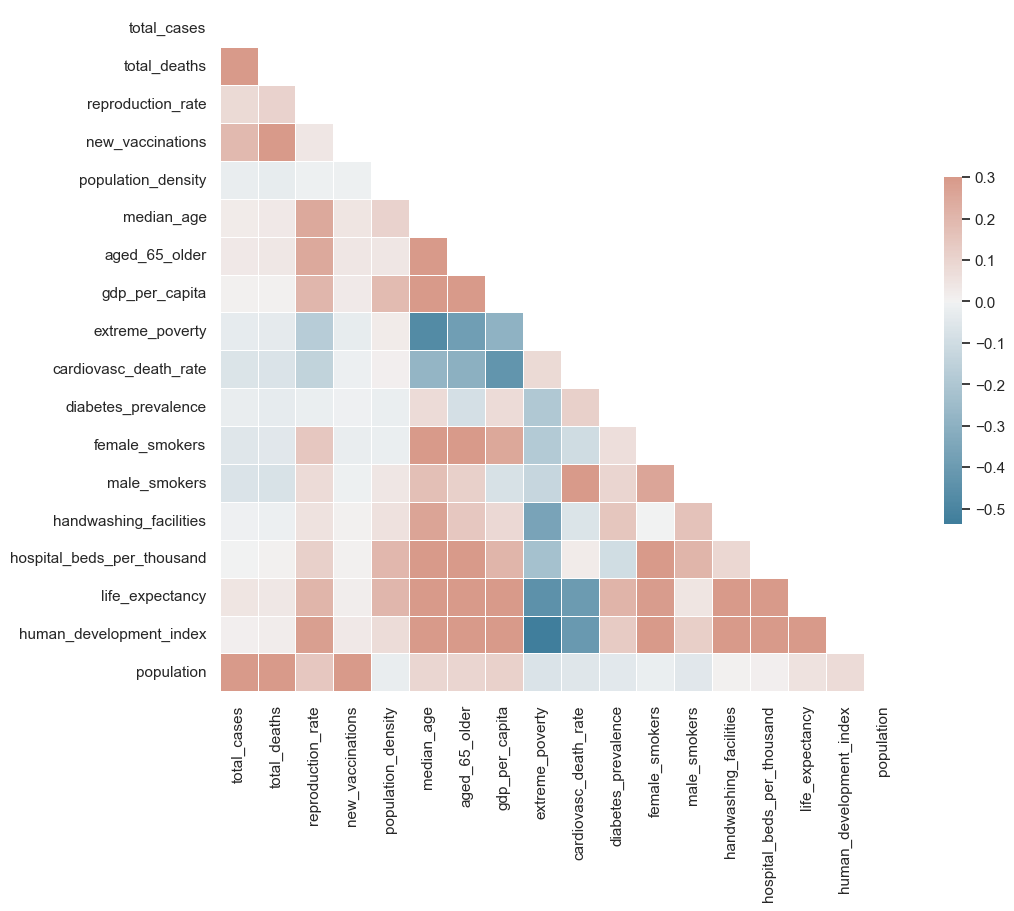

In [42]:
#Plotting a Correlation Matrix
corr = df_interpolate.corr()

sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
